# Anime Recommendation Engine

As per Wikipedia, Anime is hand-drawn and computer animation originating from Japan. The word anime is the Japanese term for animation, which refers to all forms of animated media. Nowadays, a lot of people are finding anime as a great form of entertainment. With its distinctive artstyle and voice-acting, it has garnered a lot of appreciation especially among the youths. As an anime fan myself, I would be exploring and also I will be building an anime recommendation engine based on the dataset - Anime Recommendation Database - which was scrapped from myanimelist.net (also known as MAL)  - a website which facilitates finding users who share similar tastes and provides a large database on anime and manga.

## Data

The dataset we will be using for building the recommendation engine will be the [Anime Recommendation Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database) which has two files - anime.csv and rating.csv. This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

**anime.csv**
1. anime_id - myanimelist.net's unique id identifying an anime.
2. name - full name of anime.
3. genre - comma separated list of genres for this anime.
4. type - movie, TV, OVA, etc.
5. episodes - how many episodes in this show. (1 if movie).
6. rating - average rating out of 10 for this anime.
7. members - number of community members that are in this anime's "group".

**rating.csv**
1. user_id - non identifiable randomly generated user id.
2. anime_id - the anime that this user has rated.
3. rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

<h2>Part 1 Data Prepration and Cleaning</h2>
    <p>Objective</p>
    <ol><li>Import all required libraries</li>
    <li>Find initial dimension of data</li>
        <li>Print the first and the last 5 rows.</li>
        <li>Convert the features to their appropriate data types </li>
        <li>Drop duplicate rows and columns, if any.</li>

<h3>Import libraries</h3>
<p> The most important library used is the <b>pandas</b>, this enables the csv to be converted to a pandas datatype and allow data manipulation. <b>Numpy</b> library adds array like functionalities to python for scientific calculations. The visulaization is carried out using <b>Matplotlib</b> and <b>Seaborn</b>.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import sys

In [2]:
# This option enables auto complete in notebook
%config IPCompleter.greedy=True

### Loading the two csv files

In [3]:
# Load csv to pandas dataframe
anime = pd.read_csv('anime.csv')
# df_test is the test dataset which will also be pre-processed together
rating = pd.read_csv('rating.csv')
# Enables viewing of all columns when using the head and tail command
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Show full column with out truncation
pd.set_option('display.max_colwidth', -1)

### Find the initial dimension of dataframe

In [4]:
print ('anime shape: ', anime.shape)
print ('rating shape: ', rating.shape)

anime shape:  (12294, 7)
rating shape:  (7813737, 3)


<blockquote>The dataframe anime initially has a dimension of 12294 x 7 which means there are 7 columns of attributes and 12294 rows of data. The dataframe rating initially has a dimension of 7813737 x 3 which means there are 3 columns of attributes and 7813737 rows of data.</blockquote>

### Getting an overview of data
by checking first and last 5 rows of the dataframes

In [5]:
# Checking first 5 rows of anime dataframe
anime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.16,151266


In [6]:
# Checking the last 5 rows of anime dataframe
anime.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [7]:
# Checking the first 5 rows of rating dataframe
rating.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [8]:
# Checking the last 5 rows of rating dataframe
rating.tail(5)

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


### Checking datatypes of all attributes

In [9]:
# Checking for anime dataframe
anime.dtypes

anime_id    int64  
name        object 
genre       object 
type        object 
episodes    object 
rating      float64
members     int64  
dtype: object

In [10]:
# Checking for rating dataframe
rating.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

In [11]:
anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [12]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


### Finding out all the null values in the attributes

In [13]:
# For anime dataframe
anime[anime.columns].isnull().sum()

anime_id    0  
name        0  
genre       62 
type        25 
episodes    0  
rating      230
members     0  
dtype: int64

In [14]:
# For rating dataframe
rating[rating.columns].isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

<blockquote>From the above information we can see that there are 62 missing values in genre feature, 25 in feature type as well as 230 in the rating feature. Since we are building a recommendation engine using collabarative filtering we will ony look at the relative rating of animes by each users.</blockquote>


## Exploratory Data Analysis and Visualisation
<b> We will be exploring the two dataframes, anime and rating so as to analyse and gain more insights from the dataset.</b> 

In [15]:
def get_cardinalities(columns):
    """To get the unique cardinalities of a column in a dataframe"""
    colist = columns.tolist()
    card = []
    for i in colist:
        k = list(str(i).split(', '))
        for j in k:
            if j not in card:
                card.append(j)
    return card

In [16]:
genre_ = get_cardinalities(anime.genre)
type_ = get_cardinalities(anime.type)
print ('There are over {} unique entries to genre feature in the anime dataframe.'.format(len(genre_)))
print ('There are over {} unique entries to type feature in the anime dataframe.'.format(len(type_)))

There are over 44 unique entries to genre feature in the anime dataframe.
There are over 7 unique entries to type feature in the anime dataframe.


In [17]:
user = rating.user_id.unique()
print ('There are {} number of unique user ids in the rating dataframe.'.format(len(user)))

There are 73515 number of unique user ids in the rating dataframe.


### Kernal Density plot of anime rating

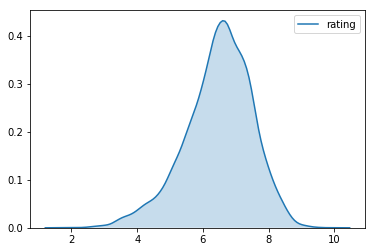

In [23]:
sns.kdeplot(anime.rating, shade = True)

<blockquote>From the above kernel density plot we can see that the distribution of average rating of anime follows a normal distribution. Most of the ratings are centered around 7-6.</blockquote>

### Kernal Density plot based on members

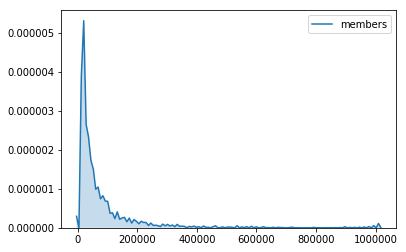

In [127]:
sns.kdeplot(anime.members, shade = True)

<blockquote>From the above kernel density plot we can see that the member distribution anime is highly skewed to the left.</blockquote>


In [36]:
anime.sort_values('members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super Power",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Supernatural, Thriller",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [98]:
# Getting a dataset of 'movie only' animes that have been in anime dataframe and storing it in movie dataframe
movie = anime[anime['type'] == 'Movie'].copy()
movie.sort_values('members',ascending = False).head()

,anime_id,name,genre,type,episodes,rating,members
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3,8.10,324035
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1,8.44,289206


In [106]:
def get_hor_bar(x1, y1, data, color=None,count = 20 ):
    """Plot's a horizontal barplot of top 20 rows"""
    plt.figure(figsize=(15, 10))
    sns.barplot(x = x1,y = y1, data = data.sort_values(x1,ascending = False)[:count], orient = 'h', hue = color)

### Top 20 Movie animes by members count

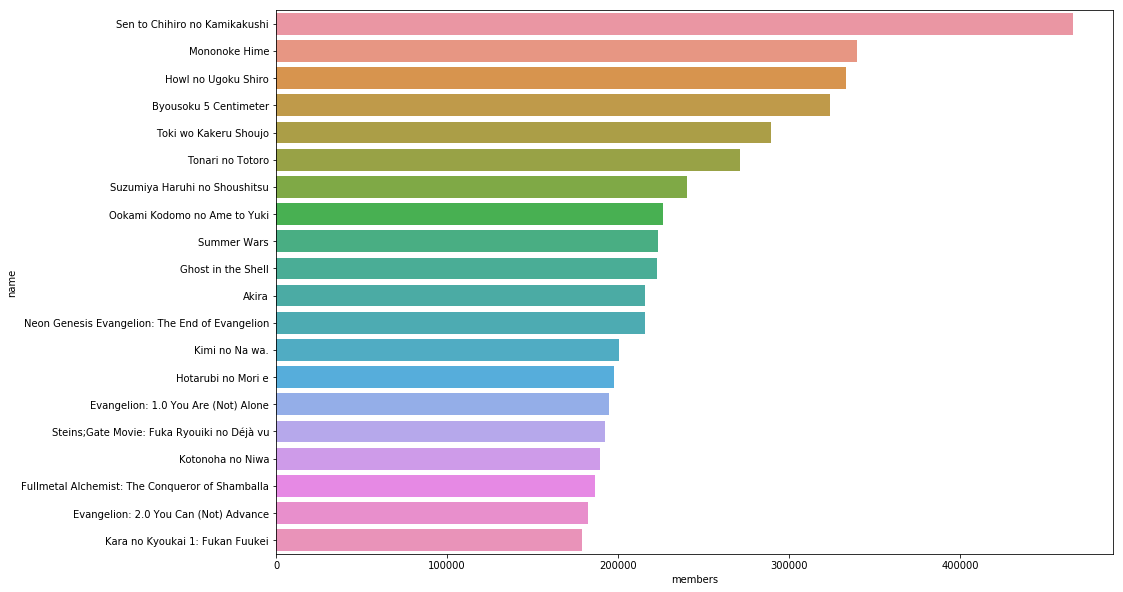

In [107]:
get_hor_bar('members','name', movie)

<blockquote>From the above horizontal barplot, we can see that the movie 'Sen to Chihiro no Kamikakushi' has a member of more than 450,000, and the difference between the no. of members of #1 and #2 movies are far more than the difference of movies at #2 and #3. This can imply that 'Sen to Chihiro no Kamikakushi' was very well recieved all over the word, during the time of release and also its still being followed today.</blockquote>

### Top 20 Animes by members count

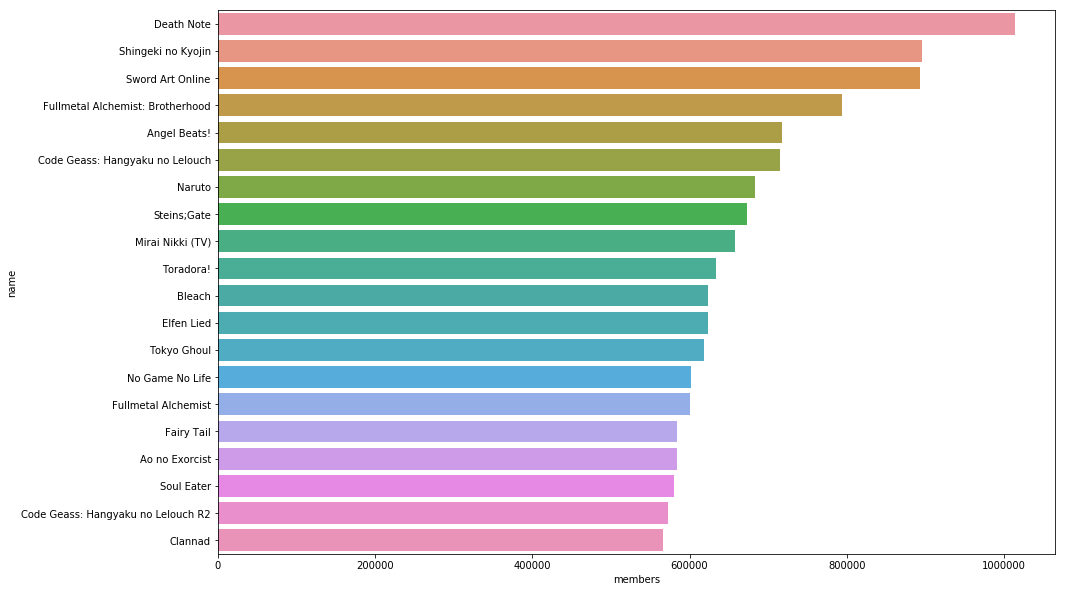

In [108]:
get_hor_bar('members','name', anime)

<blockquote>From the above horizontal barplot, we can see that Death Note has a member count of more than a whopping 1 million.</blockquote>

### Top 20 Animes based on Average Rating

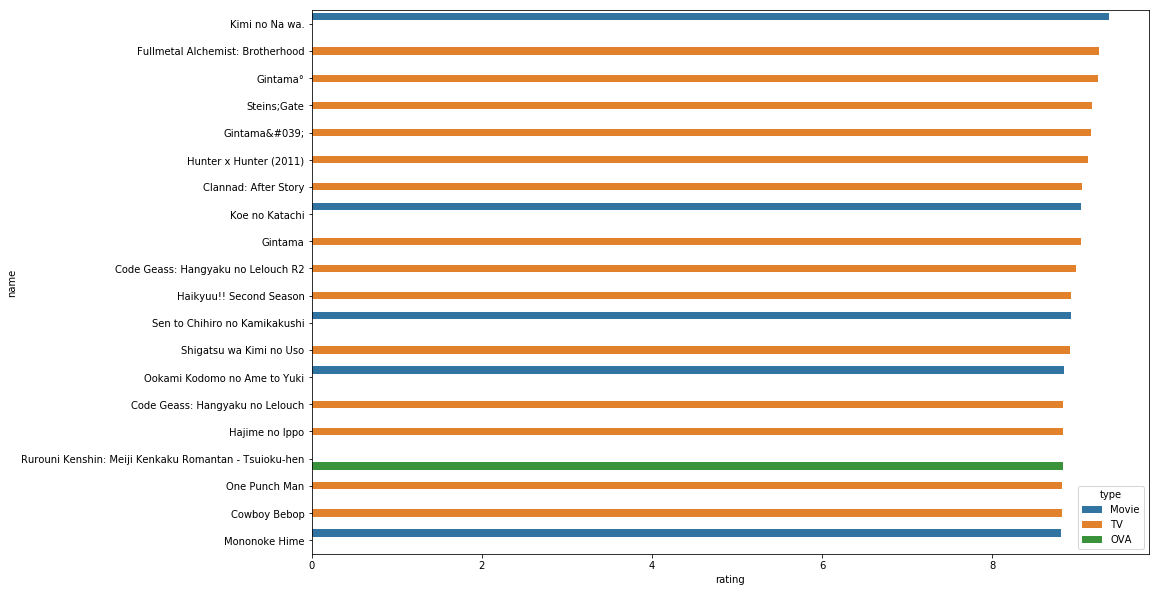

In [115]:
# We have chosen animes that have members having greater than 100000 members 
get_hor_bar('rating','name',anime[anime.members > 100000],'type')

<blockquote>From the above plot, we can see that the the highest rating anime is a movie, 'Kimi no na wa', while most of the titles in top 20 are held by tv shows. Also, there is only 1 OVA which is at the top 20 most rated animes.</blockquote>

### Top 20 TV Animes based on rating

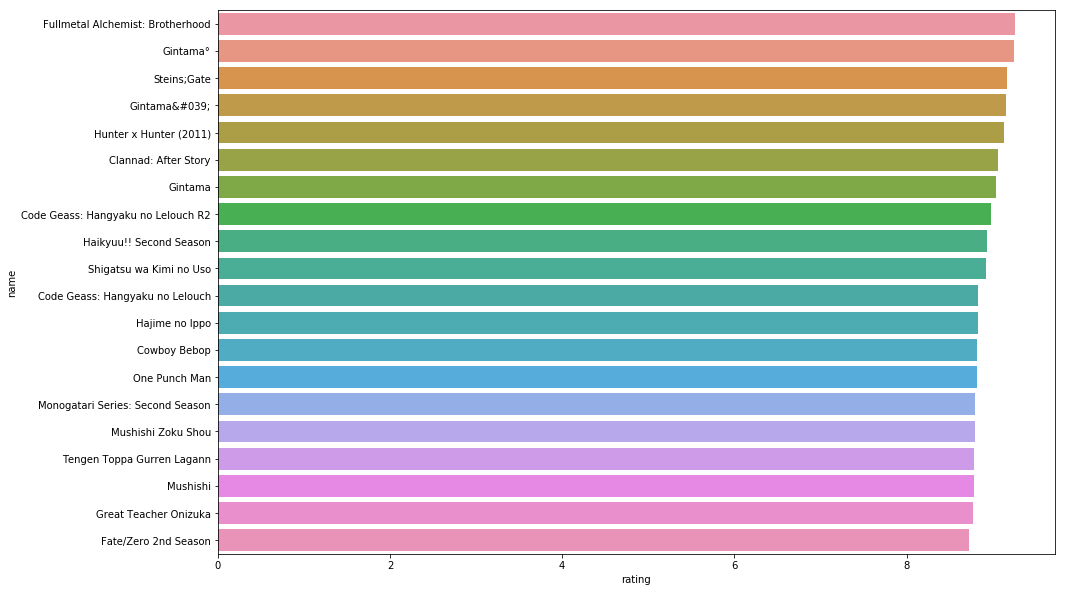

In [122]:
get_hor_bar('rating','name',anime[(anime.members > 100000) & (anime.type == 'TV')])

### Top 20 Movie Animes based on average rating

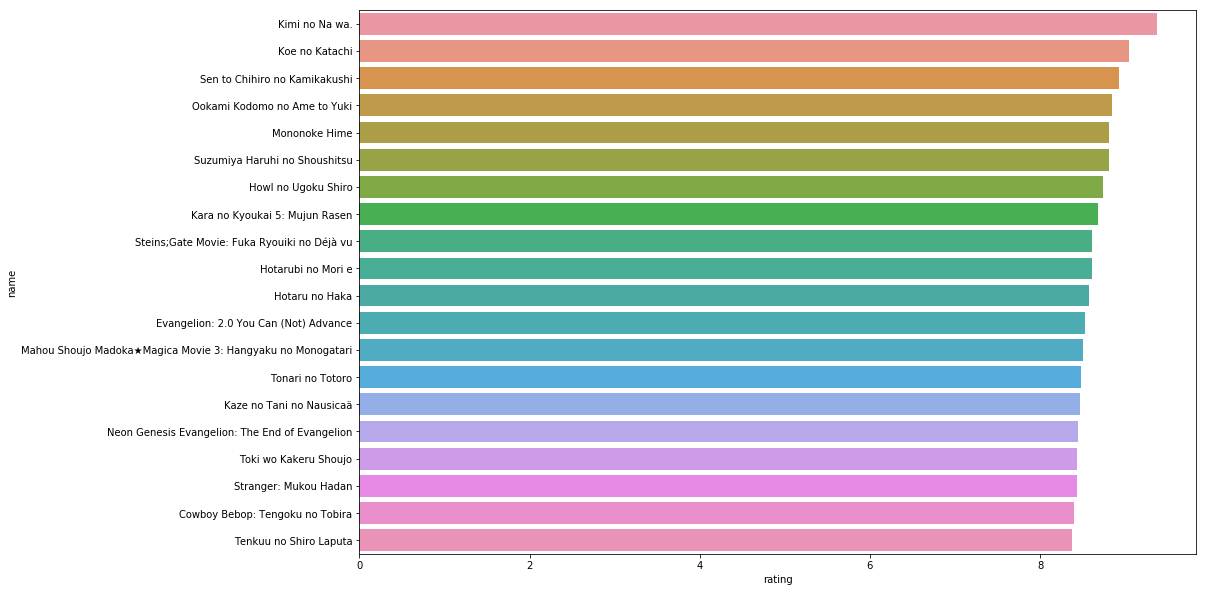

In [123]:
get_hor_bar('rating','name',anime[(anime.members > 100000) & (anime.type == 'Movie')])

### Top 20 Anime OVA's based on average ratings

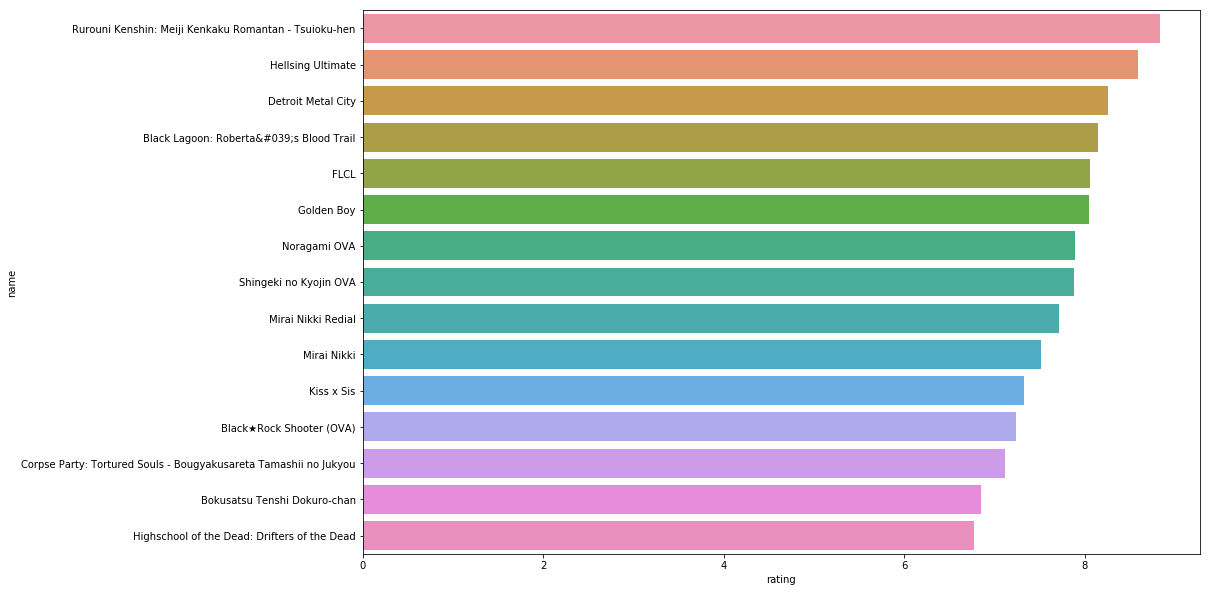

In [125]:
get_hor_bar('rating','name',anime[(anime.members > 100000) & (anime.type == 'OVA')])